## MIS 382N: ADVANCED MACHINE LEARNING<b>

## Assignment 2

### Group Members:
    Manvi Goyal(mg65952)
    Kshitij Mahajan(ksm3267)

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)
## Part a

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

### Model Bias: 
* The bias in the model is introduced when we introduce simplifying assumptions in the model to make the target function easier to learn
* Biasedness tells us how well a model matches the training set. A model with high bias won’t match the data set closely, while a model with low bias will match the data set very closely
* Usually overly simple models have high bias and fail to capture the trends present in the data set

### Bias of a point estimator
* Point estimation is the process of finding an approximate value of some parameter such as the mean of a population by using random samples of the population which is usually the "best estimate" of an unknown population parameter
* Hence, the difference between the expected value of the estimator and the value of the parameter being estimated is referred to as the bias of a point estimator
* It usually tells us the distance between mean of the estimator and the parameter's value
* Therefore, the point estimator is unbiased when the expected value of the parameter and the value of the parameter being estimated is equal
* The closer the expected value of a parameter is to the value of the parameter being measured, the lesser the value of the bias is

## Part b

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

 Learning curves are used to evaluate the model performnace i.e. whether the model is suffering from high bias or high variance. It basically shows the relationship between training set size and your chosen evaluation metric on your training and validation sets.

### Learning curves showing overfitting
 Overfitting is introduced in the model when it fits too well on the training dataset which essentially means they follow the errors, or noise, too closely

 Learning curve shows overfitting when the validation curve decreases upto a certain point but begins increasing again whereas the training curve continues to decrease as the sample size increases. This attribute of the validation curve signifies that model is overfit as validation error is is increasing again after a certain point.

### Learning curves showing underfitting

 Whereas, the model is underfitting when training curve is a flat line indicating that model was unable to fit well on the training dataset. The underfit can also be identified when training curve keeps on decreasing till the end of the learning curve plot which indicates that model can be further improved, the training process was halted prematurely.


# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

## Part A

In [29]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
import requests
import io

response = requests.get('https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/data.npy')
response.raise_for_status()

data_load = np.load(io.BytesIO(response.content), allow_pickle=True)

In [31]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
#x_all = np.linspace(-10,10,101).reshape(-1,1)
x_all = np.linspace(-5,5,101).reshape(-1,1)
lrp = LinearRegression()
degree = [2,4,7]

In [32]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all),
  # and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
  fig, ax = plt.subplots(1,2, sharex= False, sharey=False)
  # ax[0].get_shared_x_axes().join(ax[0], ax[1])
  fig.set_size_inches(30, 10,  forward=True)

  ax[0].scatter(x_train, y_train,
                marker = "*", s = 15, c = "orange")
  
  ax[0].scatter(x_test, y_test,
                marker = "*", s = 15, c = "blue")
  
  train_mse = np.array([0.0]*3)
  test_mse = np.array([0.0]*3)
  all_mse = np.array([0.0]*3)
  
  for i in range(len(degree)):
    x_train_mod = np.vander(np.squeeze(x_train),N= degree[i]+1)
    x_test_mod = np.vander(np.squeeze(x_test),N= degree[i]+1)
    x_all_mod = np.vander(np.squeeze(x_all),N= degree[i]+1)

    model = lrp.fit(x_train_mod, y_train)
    y_pred_train = model.predict(x_train_mod)
    y_pred_test = model.predict(x_test_mod)
    y_pred_all = model.predict(x_all_mod)

    train_mse[i] = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
    test_mse[i] = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
    print('\nFor model with Degree:', degree[i])
    print('\n\tTrain MSE: ', train_mse[i])
    print('\n\tTest MSE: ', test_mse[i])

    tmp_x_train, y_pred_train = list(zip(*sorted(list(map(tuple, zip(x_train,y_pred_train))), key = lambda x: x[0])))
    tmp_x_test, y_pred_test = list(zip(*sorted(list(map(tuple, zip(x_test,y_pred_test))), key = lambda x: x[0])))
    tmp_x_all, y_pred_all = list(zip(*sorted(list(map(tuple, zip(x_all,y_pred_all))), key = lambda x: x[0])))

    ax[0].plot(tmp_x_test, y_pred_test)
    
    ax[0].set_title("Train-Test Datapoints & Test Curves")
    ax[0].legend(["Polynomial Degree {}".format(x) for x in degree]+["Training Data","Test Data"])
    
    ax[1].plot(tmp_x_all, y_pred_all)
    ax[1].set_title("Curves on x_all")
    ax[1].legend(["Polynomial Degree {}".format(x) for x in degree])
    
  plt.show()
  return np.sqrt(train_mse), np.sqrt(test_mse)


For model with Degree: 2

	Train MSE:  247.29679797371534

	Test MSE:  320.06408346977855

For model with Degree: 4

	Train MSE:  31.72001805729006

	Test MSE:  31.29208288660674

For model with Degree: 7

	Train MSE:  30.67719359210973

	Test MSE:  33.410694077690025


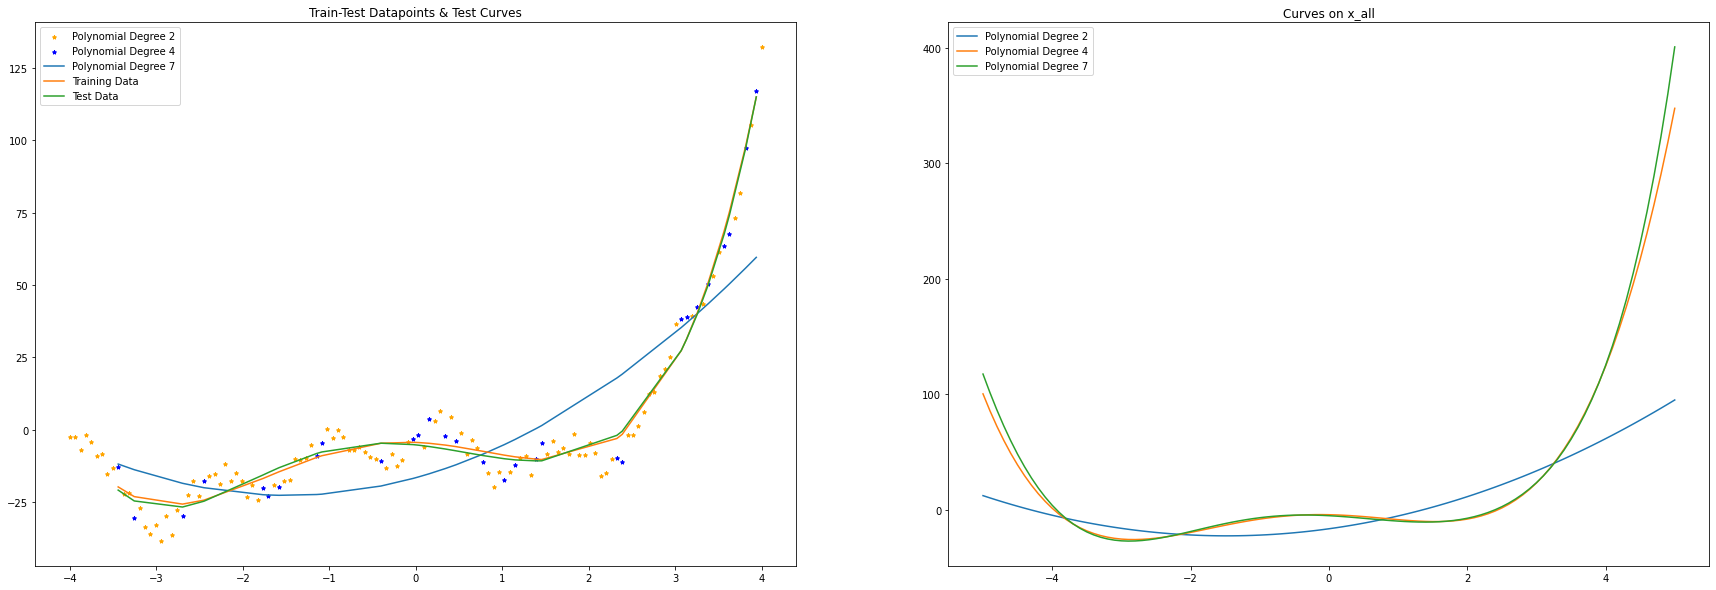

In [33]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### Part B

The degree 2 curve represents a model that is simple, having relatively high bias and low variance, changing direction atmost once. However, as shown by the scatter plot of data points, the degree 2 curve is not a good fit and has underfit the data.

The degree 7 curve represents a more complicated model, having high variance and low bias, changing direction atmost 6 times. Based on the curves shown on the plot, it fits the data better than the second degree polynomial. But, this overfits the data

The degree 4 curve has an intermediate bias and variance. As per the graph, this curve is very close to the graoh for degree 7, and can change its direction atmost 3 times, creating a more smoother curve than the degree 7 graph.

### Part C

20% data

For model with Degree: 2

	Train MSE:  161.17147378830037

	Test MSE:  402.32312690992865

For model with Degree: 4

	Train MSE:  35.1151131391298

	Test MSE:  38.3407449834428

For model with Degree: 7

	Train MSE:  22.543946691373332

	Test MSE:  135.20764526756463


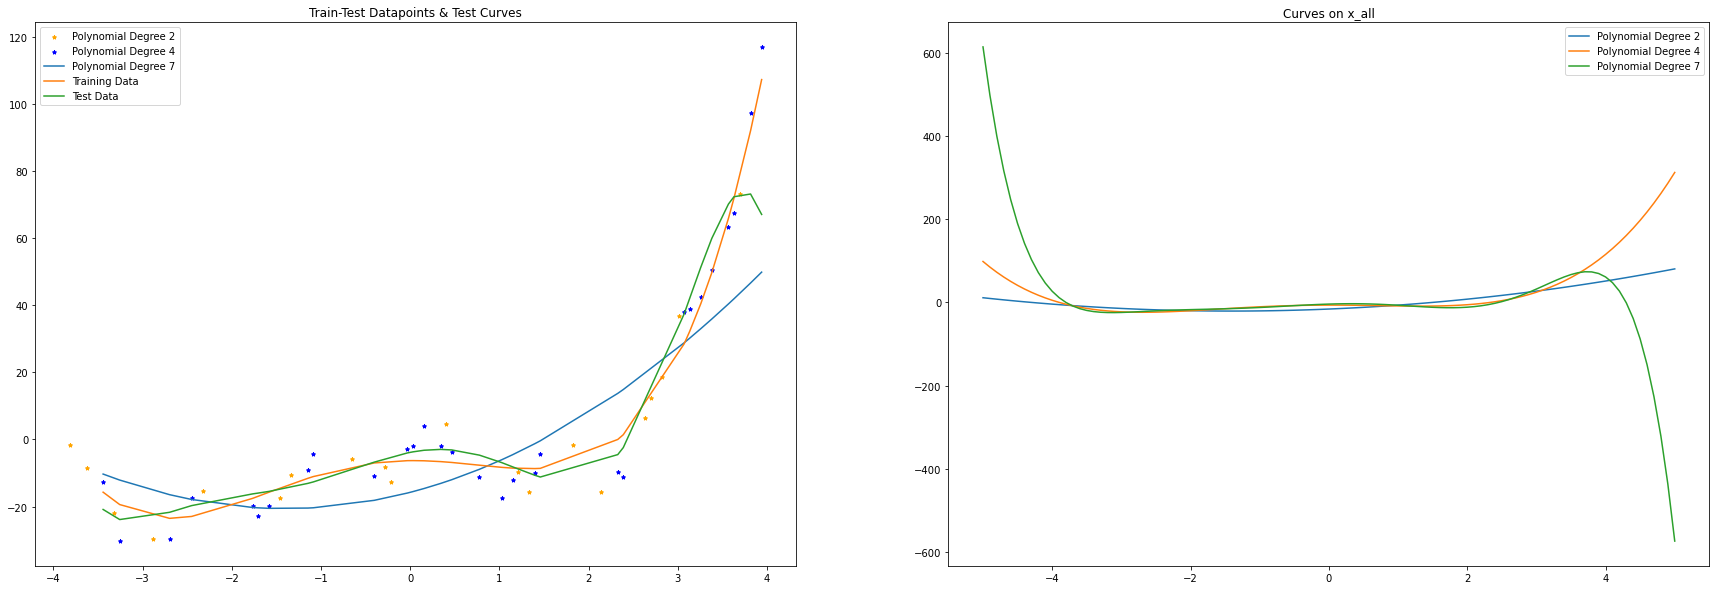

40% data

For model with Degree: 2

	Train MSE:  150.332512860857

	Test MSE:  405.80516696165745

For model with Degree: 4

	Train MSE:  31.62452964644691

	Test MSE:  33.164282959187425

For model with Degree: 7

	Train MSE:  25.492718751653616

	Test MSE:  61.23741884551077


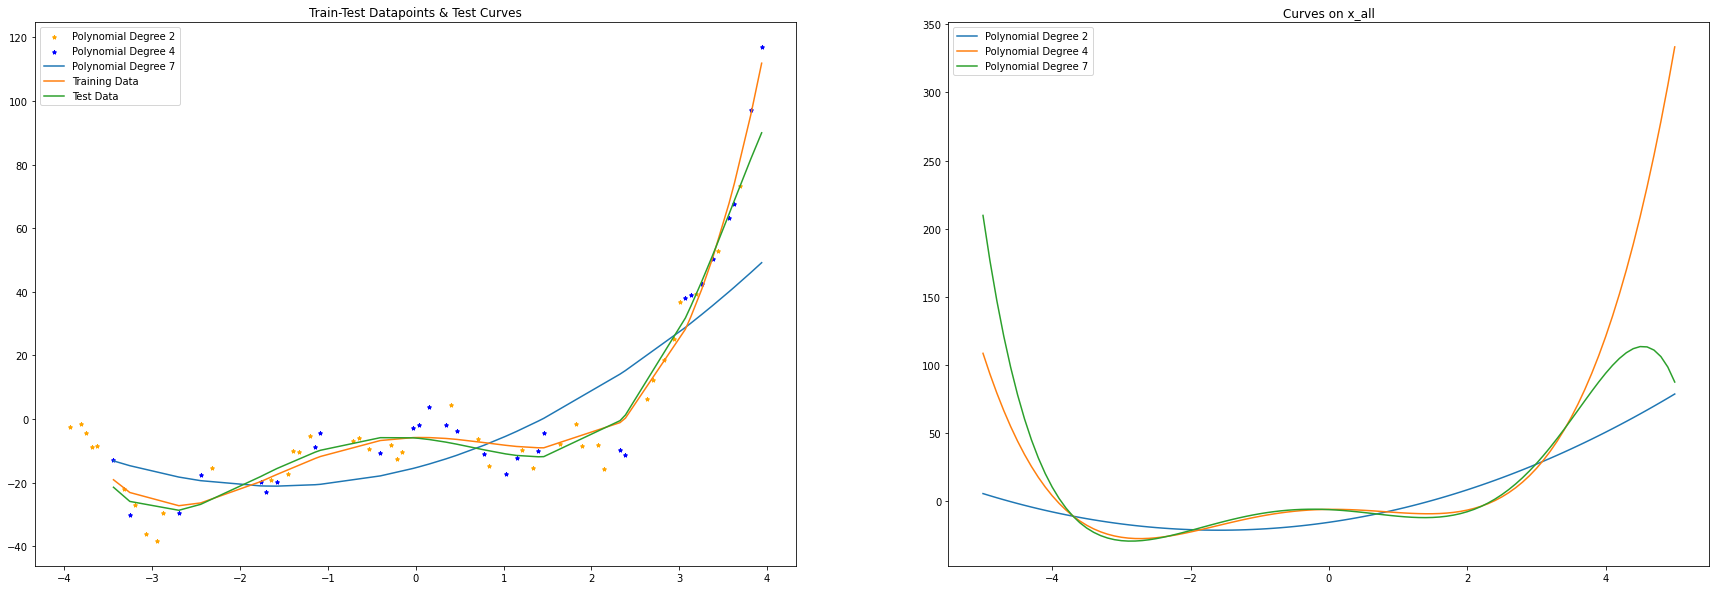

60% data

For model with Degree: 2

	Train MSE:  150.08383759141728

	Test MSE:  403.2513784833407

For model with Degree: 4

	Train MSE:  29.192805739947897

	Test MSE:  31.78141541619674

For model with Degree: 7

	Train MSE:  26.099088642454422

	Test MSE:  60.16667237664493


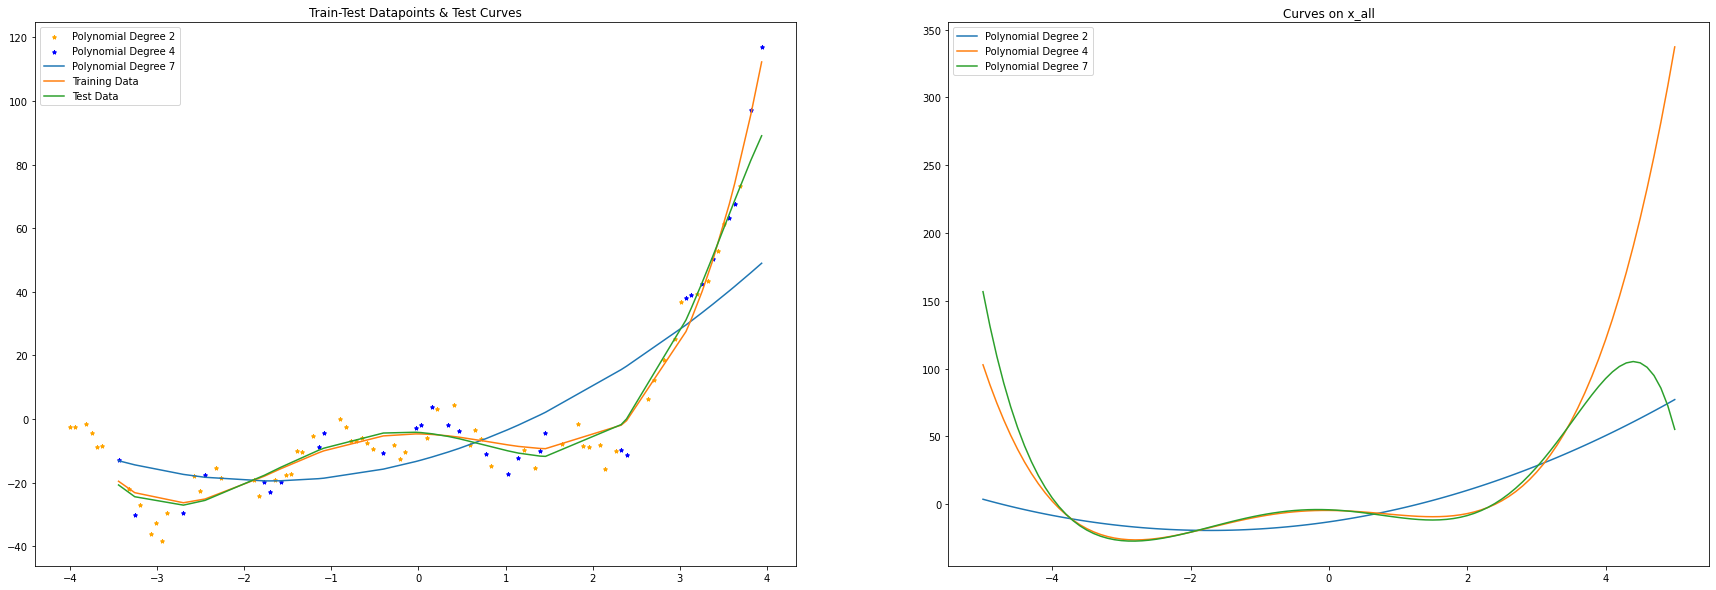

80% data

For model with Degree: 2

	Train MSE:  168.1188246150281

	Test MSE:  407.5936968818472

For model with Degree: 4

	Train MSE:  29.305108483323444

	Test MSE:  32.51810686874261

For model with Degree: 7

	Train MSE:  26.549129596283638

	Test MSE:  48.07693529710737


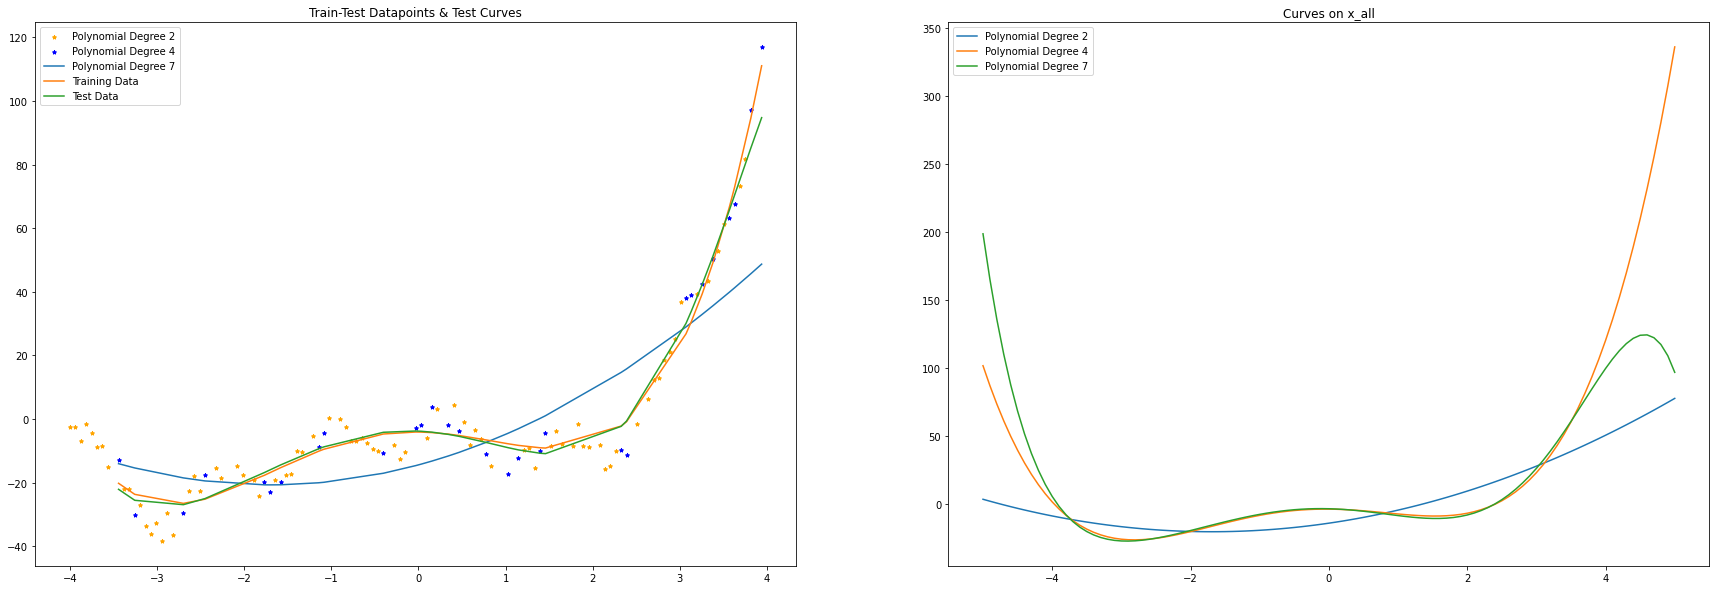

100% data

For model with Degree: 2

	Train MSE:  247.29679797371534

	Test MSE:  320.06408346977855

For model with Degree: 4

	Train MSE:  31.72001805729006

	Test MSE:  31.29208288660674

For model with Degree: 7

	Train MSE:  30.67719359210973

	Test MSE:  33.410694077690025


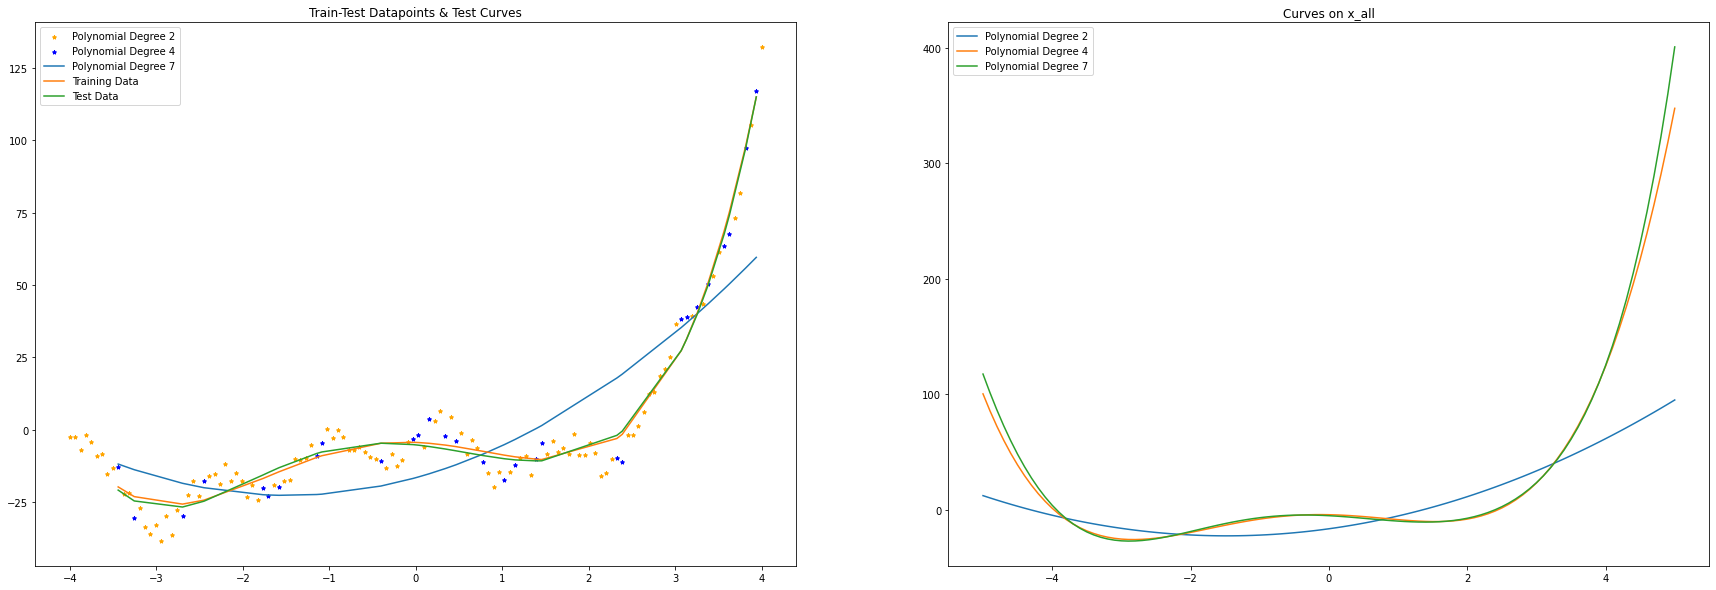

In [34]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

[]

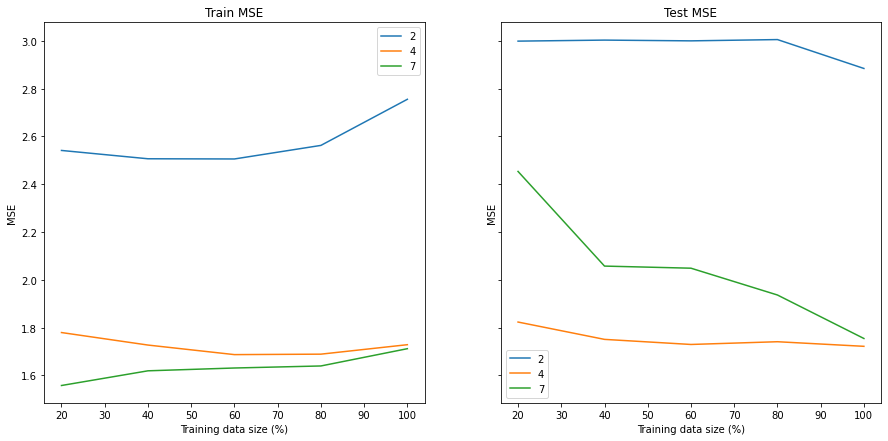

In [35]:
import pandas as pd
size = [20,40,60,80,100]

train_mse = pd.DataFrame(np.array([np.log(train_rmses_20), np.log(train_rmses_40), np.log(train_rmses_60), np.log(train_rmses_80), np.log(train_rmses_100)]))
train_mse.columns = degree
train_mse.index = size

test_mse = pd.DataFrame(np.array([np.log(test_rmses_20), np.log(test_rmses_40), np.log(test_rmses_60), np.log(test_rmses_80), np.log(test_rmses_100)]))
test_mse.columns = degree
test_mse.index = size
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches(15, 7,  forward=True)

ax[0].plot(train_mse)
ax[0].legend(train_mse.columns)
ax[0].set_title("Train MSE")
ax[0].set_xlabel("Training data size (%)")
ax[0].set_ylabel("MSE")

ax[1].plot(test_mse)
ax[1].legend(test_mse.columns)
ax[1].set_title("Test MSE")
ax[1].set_xlabel("Training data size (%)")
ax[1].set_ylabel("MSE")

plt.plot()


Based on the graphs above, we observe the following:

## Degree 2 polynomial

 The polynomial model with degree 2 has a high bias. Hence, it is less complex, fits the datapoints quickly and is compartively stable. We can observe the MSE is fairly constant when the model trains against 20%, 40% or even 70% of the data.
 Initially, the model exhibits a slight decrease in MSE values which can be accounted on decreasing variance as training size increases.
 Overall the model has a very high MSE values, which is probably the cost of a over-simplified high-bias second degree model.

## Degree 4 polynomial

 In terms of stablity, the Degree 4 polynomial model performs relatively well . While this model has a has a lower bias than the degree 2 model, it is still not that much complex. The model's training MSE keeps decreasing gradually as the training size increases.

## Degree 7 polynomial

 The Degree 7 polynomial has a very low bias(lowest amongst three models)making the model too complex. It does not fit the data well and the given  data size is not enough for it to learn from. Therefore, its train MSE is increasing.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

## Part A

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

  Momentum helps to reduce the learning variation perpendicular to the direction of the local optima.To add to this, it also accelerates the convergence in the direction of the local optima. IF we see the diagram given in the blog. we can see that the optima is present at the right side of initial position or point in the horiziontal direction. If we use significantly high learning rate to find the minima of loss function, it causes more number of oscillations in the vertical direction. This oscillations are inefficient and undesirable, as the number of iterations to reach the optima increases.We can overcome this issue by using exponentially weighted averages.By using exponentially weighted averages, oscillations in vertical direction are averaged out towards zero; and  the derivatives in the horizontal direction are added,which eventualy leads to converging towards the local optima of the loss function faster.

## Part B

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.

 Mini-batch Gradient Descent is the mix of advatnages of both - Batch Gradient Descent and the Stochastic Gradient Descent. In Batch Gradient Descent, the entire training dataset is used to calculate the gradient and the weight is updated in each iteration. On the other hand, the Stochastic Gradient Descent uses only one random data point from the training set in each iteration to calculate gradient and update weights. 
 
 We could come up with following advantages of Mini-batch SGD:

 1.In the Mini-batch SGD, we only use a few data points(A batch) in each iteration. For the next iteration, we use the next 'mini-batch'. This process continues till we have used the entire training set. This is called one epoch, and we usually perform multiple such epochs with new batches each time, to get to the optimum value.
The advantage of using a small batch instead of the entire set is the reduction in computation memory and power. If the training set is too large, a large amount of computational memory and power is required. Sometimes computation is impossible. We could also run out of memory. However, if the batch is smaller than the entire training set by a factor of n, then the computation at each iteration will also reduce to factor of n. The memory requirements are also reduced since we are not passing our entire training set to calculate gradient.

 2.In the case of SGD where we only consider one data point at a time, we get a noisy path with a lot of noise. This is because in each iteration, we are only approximating the gradient with a single data point. Hence we will see a lot of fluctuations in the cost and a lower accuracy. Using a mini-batch instead will smoothen out the path and will have a better accuracy.


# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

### Subquestion 1 : Stochastic gradient descent derivation
Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients  𝑤0,𝑤1,𝑤2,𝑤3  in this model：

𝑦=𝑤0+𝑤1𝑒−𝑥1+𝑤2𝑥1+𝑤3𝑥1𝑥2



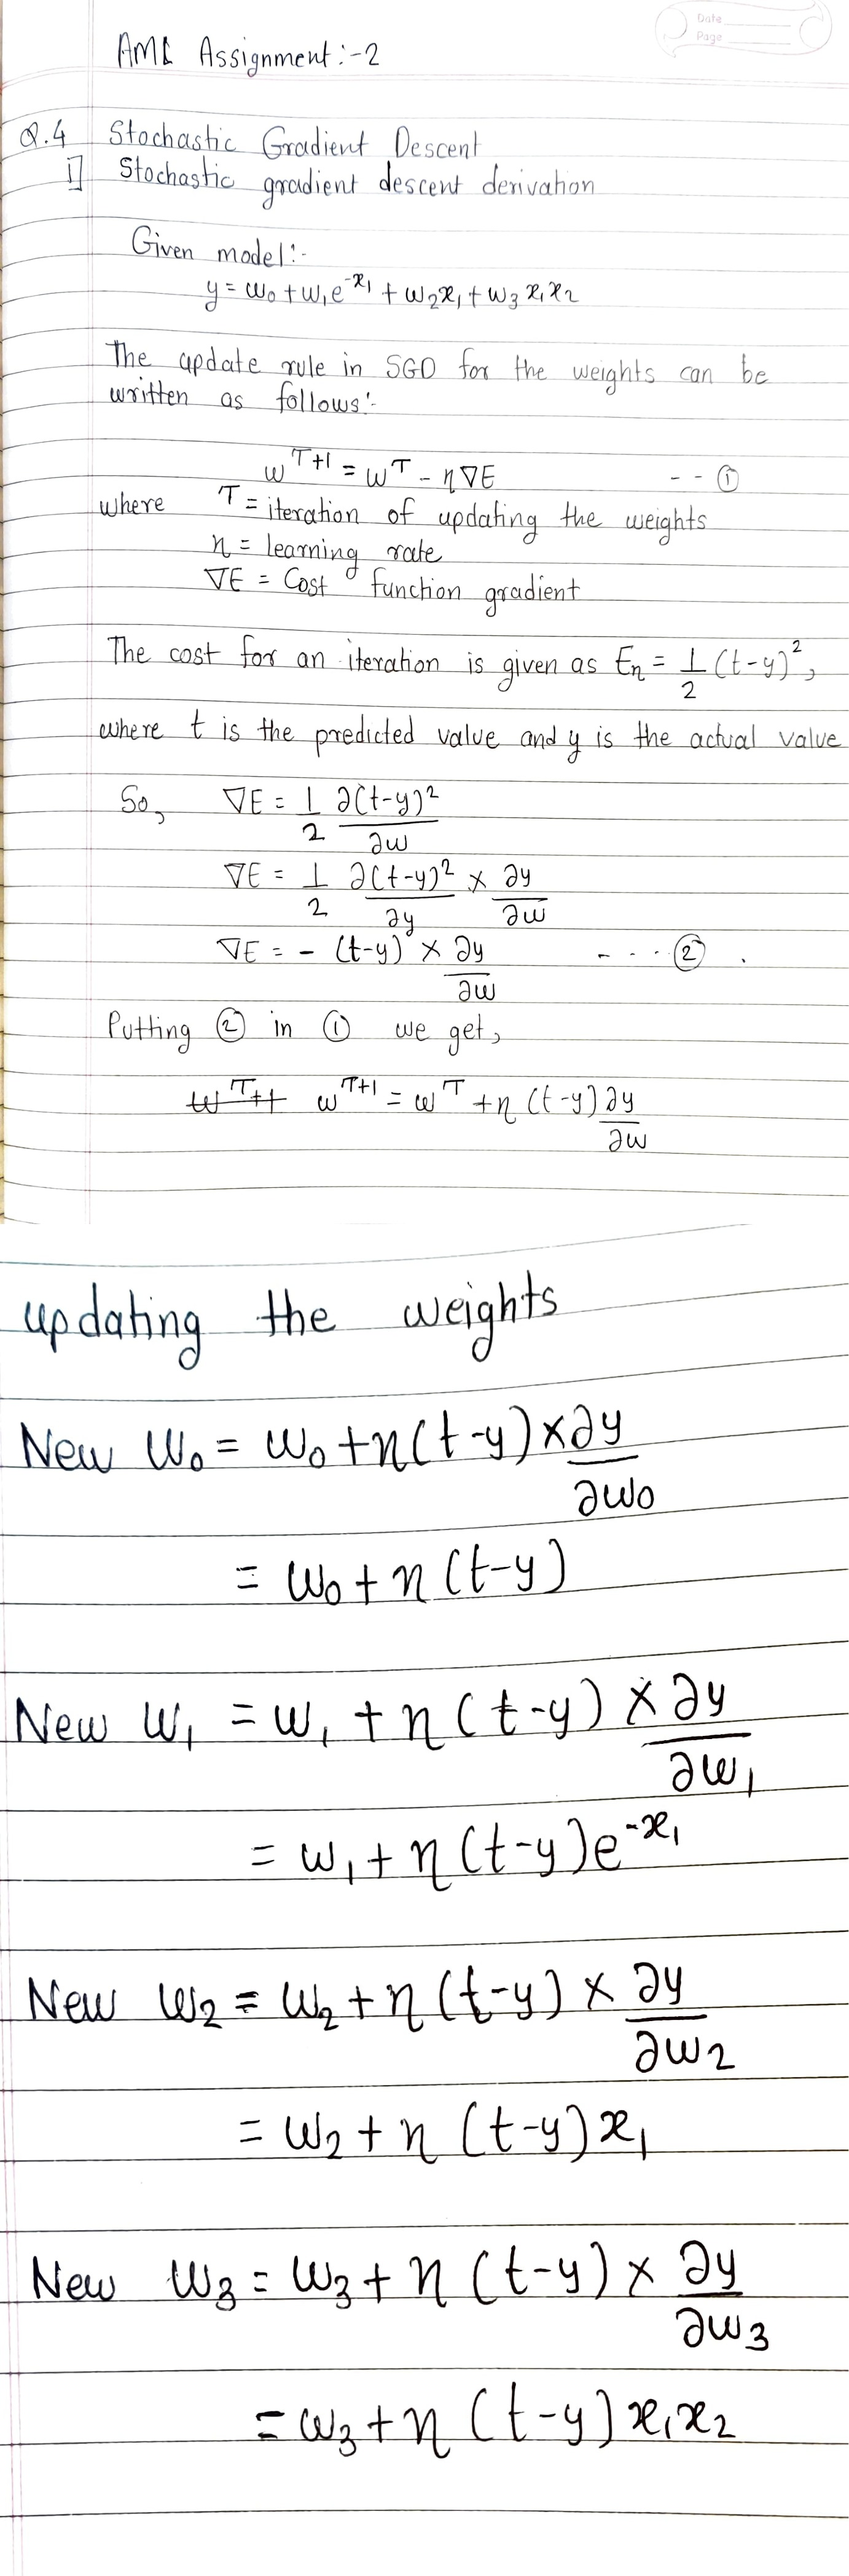

In [36]:
from IPython import display

display.Image("https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/AML%20assignment%202%20final%20answer.jpeg")

### Subquestion 2 : Stochastic gradient descent coding

Code an SGD solution in Python for this non-linear model
𝑦=𝑤0+𝑤1𝑒−𝑥1+𝑤2𝑥1+𝑤3𝑥1𝑥2
 
The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

#### Part A
Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the  𝑤  parameters as a function of epoch (for 15 epochs) .

In [37]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        # please put your codes here to update the self.coef using SGD
        self.coef -= gradient*(self.learning_rate)
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)
    
    def fit(self, X, y, update_rule='bgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        
        for epoch in range(self.n_epoch):
            if update_rule == "bgd":
                gradient = np.dot(X.T,(self.linearPredict(X) - y))
                self.sgd(gradient)
            
            elif update_rule == "sgd":
                gradient = np.array([0.0]*self.coef.shape[0])
                for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                   hypothesis = self.linearPredict(X[i]) # Predicted Y
                   error = hypothesis - y[i]
                # Compute gradients
                    #please put your codes here
                   gradient = error*X[i]   
                # Update weights
                   self.sgd(gradient)

            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef)

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/KshitijMahajan1998/AML_NEW/main/SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [39]:
import warnings
warnings.filterwarnings('ignore')
mse = pd.DataFrame(columns=learning_rate, index=regularization)
for alpha in learning_rate:
    for lamda in regularization:
        model = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
        model.fit(X,y, update_rule="sgd", plot= False)
        mse[alpha][lamda] = model.lowest_mse
mse

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000
0,0.036821,0.030496,0.027391,0.030988,inf,NaN,NaN
10,0.040382,0.033707,0.033821,0.034648,NaN,NaN,NaN
100,0.040672,0.033795,0.033805,NaN,NaN,NaN,NaN


MSE for SGD with Leaning Rate 0.01 and Regularisation Coefficient 0: 0.0274


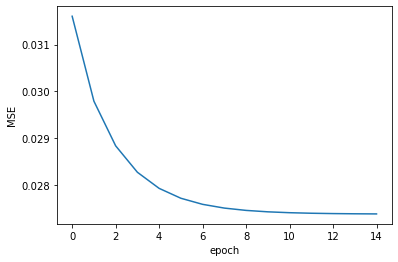

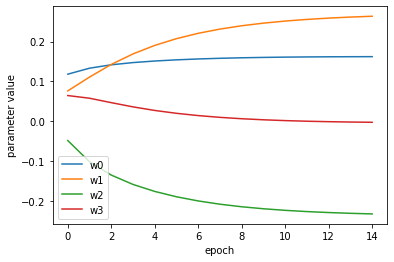

In [40]:
# Minimum MSE
alpha = 0.01
lamda = 0
model1 = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
model1.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(model1.lowest_mse, 4)))

MSE for SGD with Leaning Rate 0.001 and Regularisation Coefficient 0: 0.0305


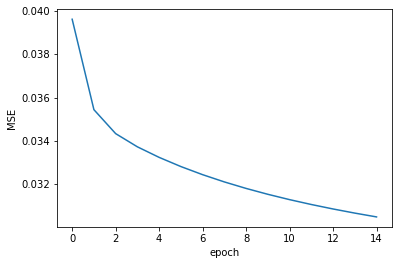

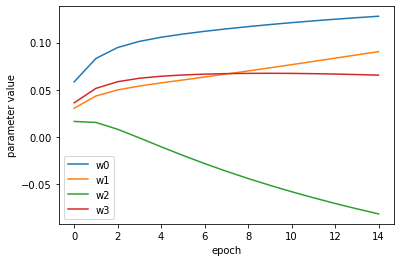

In [41]:
# Second Minimum
alpha = 0.001
lamda = 0
model2 = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
model2.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(model2.lowest_mse, 4)))

#### Part B

Report the MSE of the two best combinations of learning rate and regularization constant.

#### Minimum

1.Leaning Rate: 0.01

2.Regularisation Coefficient: 0

3.MSE: 0.0274

#### Second minimum

1.Leaning Rate: 0.001

2.Regularisation Coefficient: 0

3.MSE: 0.0305